--- RESULTADOS DA SIMULAÇÃO (GS SERS 2025) ---
Consumo Diário Atual: 117.40 kWh
Consumo Diário Otimizado: 89.60 kWh
Redução Alcançada: 23.68% (Meta do PDF: ~28%)
------------------------------
Geração Solar Diária (5kWp): 26.09 kWh
Cobertura da Demanda Otimizada: 29.11% (Meta do PDF: 45-58%)


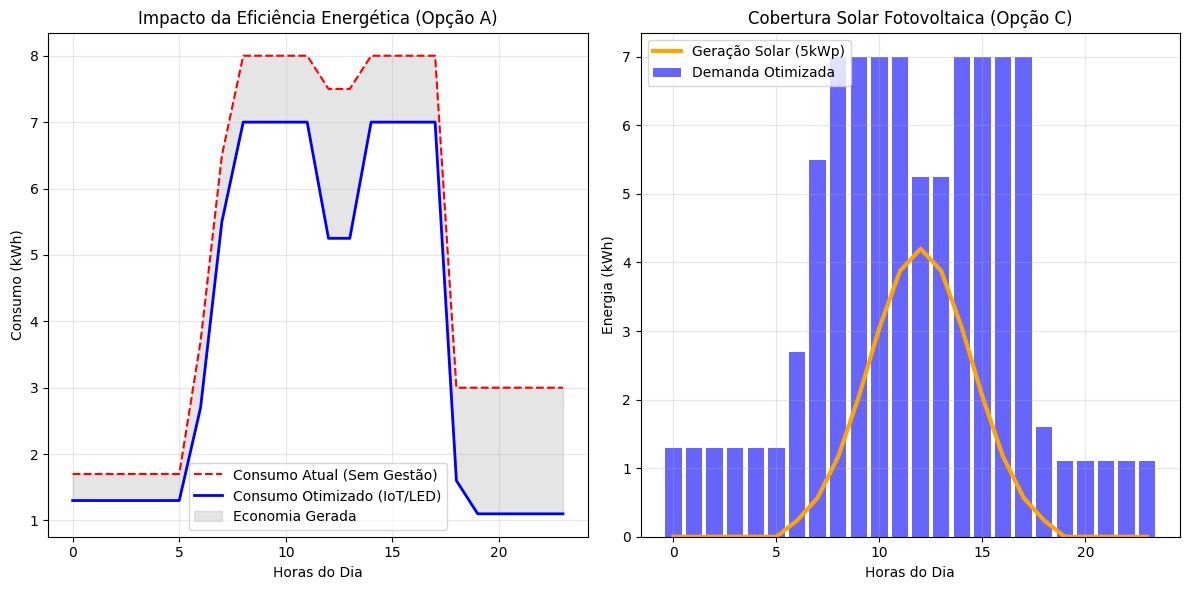

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração para garantir reprodutibilidade (os mesmos números sempre que rodar)
np.random.seed(42)

# --- 1. CRIAÇÃO DOS DADOS (SIMULAÇÃO DE CENÁRIO ATUAL) ---
# Criando um dia típico de 24 horas (0 a 23h)
horas = np.arange(24)

# Consumo simulado (em kWh) por hora
# Iluminação: Alta durante o dia, mas com desperdício à noite
iluminacao = np.array([0.5]*6 + [2.5]*12 + [1.0]*6)

# Climatização: Pico no horário comercial, desperdício no almoço e final do dia
climatizacao = np.array([0.2]*7 + [3.0]*5 + [2.5]*2 + [3.0]*4 + [1.0]*6)

# Equipamentos: Servidores e PCs
equipamentos = np.array([1.0]*24) # Servidores 24h
pico_equip = np.array([0]*8 + [1.5]*10 + [0]*6) # PCs ligados
total_equipamentos = equipamentos + pico_equip

# Consumo Total Atual
consumo_atual = iluminacao + climatizacao + total_equipamentos

# --- 2. APLICAÇÃO DA SOLUÇÃO (OPÇÃO A - OTIMIZAÇÃO) ---
# Redução baseada na "Troca por LED" e "Automação" descrita no PDF

# Otimização: LEDs gastam 40% menos e sensores desligam luz fora de uso
iluminacao_otimizada = iluminacao * 0.6
iluminacao_otimizada[0:6] = 0.1 # Madrugada quase zero
iluminacao_otimizada[19:24] = 0.1 # Noite quase zero

# Otimização: Ar condicionado ajustado e desligamento automático
climatizacao_otimizada = climatizacao.copy()
climatizacao_otimizada[12:14] = climatizacao_otimizada[12:14] * 0.5 # Eco no almoço
climatizacao_otimizada[18:24] = 0 # Desligamento forçado após expediente

# Consumo Otimizado
consumo_otimizado = iluminacao_otimizada + climatizacao_otimizada + total_equipamentos

# Calculando a Economia
total_dia_atual = np.sum(consumo_atual)
total_dia_otimizado = np.sum(consumo_otimizado)
reducao_percentual = (1 - (total_dia_otimizado / total_dia_atual)) * 100

# --- 3. SIMULAÇÃO SOLAR (OPÇÃO C - RENOVÁVEIS) ---
# Sistema de 5 kWp [cite: 44]
# Curva de Geração Solar (distribuição normal "Sino" entre 6h e 18h)
geracao_solar = np.zeros(24)
pico_solar = 4.2 # kWh no pico (considerando perdas do sistema de 5kWp)
centro_dia = 12
largura = 2.5
geracao_solar = pico_solar * np.exp(-(horas - centro_dia)**2 / (2 * largura**2))
geracao_solar[geracao_solar < 0.1] = 0 # Limpa valores noturnos residuais

total_solar = np.sum(geracao_solar)
cobertura_solar = (total_solar / total_dia_otimizado) * 100

# --- 4. EXIBIÇÃO DOS RESULTADOS ---

print(f"--- RESULTADOS DA SIMULAÇÃO (GS SERS 2025) ---")
print(f"Consumo Diário Atual: {total_dia_atual:.2f} kWh")
print(f"Consumo Diário Otimizado: {total_dia_otimizado:.2f} kWh")
print(f"Redução Alcançada: {reducao_percentual:.2f}% (Meta do PDF: ~28%)")
print(f"-"*30)
print(f"Geração Solar Diária (5kWp): {total_solar:.2f} kWh")
print(f"Cobertura da Demanda Otimizada: {cobertura_solar:.2f}% (Meta do PDF: 45-58%)")

# --- 5. GERAÇÃO DE GRÁFICOS ---
plt.figure(figsize=(12, 6))

# Gráfico 1: Comparação de Consumo
plt.subplot(1, 2, 1)
plt.plot(horas, consumo_atual, label='Consumo Atual (Sem Gestão)', color='red', linestyle='--')
plt.plot(horas, consumo_otimizado, label='Consumo Otimizado (IoT/LED)', color='blue', linewidth=2)
plt.fill_between(horas, consumo_atual, consumo_otimizado, color='gray', alpha=0.2, label='Economia Gerada')
plt.title('Impacto da Eficiência Energética (Opção A)')
plt.xlabel('Horas do Dia')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Integração com Solar
plt.subplot(1, 2, 2)
plt.bar(horas, consumo_otimizado, label='Demanda Otimizada', color='blue', alpha=0.6)
plt.plot(horas, geracao_solar, label='Geração Solar (5kWp)', color='orange', linewidth=3)
plt.title('Cobertura Solar Fotovoltaica (Opção C)')
plt.xlabel('Horas do Dia')
plt.ylabel('Energia (kWh)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('resultado_simulacao.png') # Salva o gráfico
plt.show()